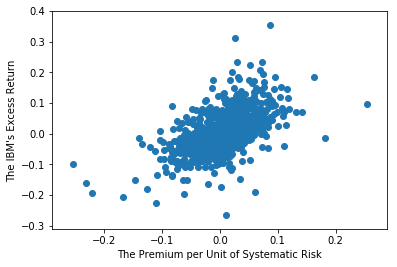

In [1]:
# We give an example of how to estimate the CAPM for IBM
# IBM return - rf = α + β(Mkt - rf) + ϵ

import pandas as pd # To load data, we use the package pandas
import numpy as np # To do mathematical operations, we use the package numpy
import matplotlib.pyplot as plt # To plot the returns data, we use the package matplotlib
import statsmodels.api as sm # We use this package to do estimation
%matplotlib inline


# Load the monthly data of IBM, from 01/1934 to 12/2011

ibmnames = ['var1', 'time', 'var3', 'return'] # Give variables' names
df = pd.read_fwf('IBM.dat', colspecs='infer', widths=None, header=None, names=ibmnames) 

T = len(df) # The number of obs

# Load the monthly data of Risk-free rates, from 01/1934 to 12/2011

riskfreenames = ['var1', 'var2', 'var3', 'var4', 'rates'] # Give variables' names
df1 = pd.read_fwf('Riskfree.dat', colspecs='infer', widths=None, header=None, names=riskfreenames) 
df1['rates'] = df1['rates']/100 # Divided by 100 b/c data are in percentage points


# Load the monthly data of S&P 500, from 01/1934 to 12/2011

spnames = ['var1','mkt'] # Give variables' names
df2 = pd.read_fwf('SP500.dat', colspecs='infer', widths=None, header=None, names=spnames)

# Get excess returns

y = df['return'] - df1['rates']
y = y.values

x = df2['mkt'] - df1['rates']
x = x.values
x.shape = (T,1)

# Plot the data

plt.scatter(x, y)
plt.ylabel('The IBM\'s Excess Return')
plt.xlabel('The Premium per Unit of Systematic Risk')
plt.show()

const = np.ones((T,1)) # The constant part
xx = np.hstack((x,const)) # Add the constant part to x

In [2]:
# Run the regression
reg = sm.OLS(endog=y, exog=xx)
result = reg.fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     315.7
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           4.58e-61
Time:                        16:27:02   Log-Likelihood:                 1408.9
No. Observations:                 936   AIC:                            -2814.
Df Residuals:                     934   BIC:                            -2804.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8020      0.045     17.767      0.0